In [1]:
import sys
sys.path.insert(1, '/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools')
import getters, tools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plateaus = getters.get_plateaus()

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.24it/s]


45000 52000
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [01:47<00:00,  4.68s/it]


68000 77300
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:09<00:00,  1.46it/s]


34000 48000
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [03:57<00:00,  3.77s/it]


138250 142250


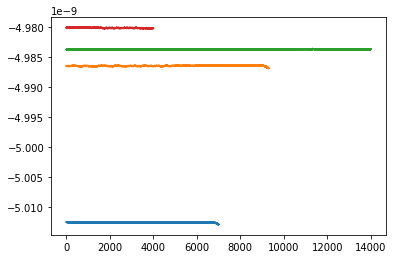

In [13]:
res_plateau = {}
for date in plateaus.keys():
    path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/" + date + "/"
    peaks = getters.get_raw_data(path, filetype="peaks", pol="Av")
    t0 = np.min(peaks["Timestamp"])
    res_plateau[date] = {}
    for plateau in plateaus[date].keys():
        res_plateau[date][plateau] = {}
        tini, tend = plateaus[date][plateau][0], plateaus[date][plateau][1]
        print(tini, tend)
        pav = peaks.loc[(peaks["Timestamp"]-t0 > tini) & (peaks["Timestamp"]-t0 < tend)].dropna().sort_values(by="Timestamp").reset_index(drop=True)
        tplot = np.min(pav["Timestamp"])
        for sens in pav.columns:
            if sens == "Timestamp":
                continue
            offset = np.mean(pav["Wav1-1"] - pav["Wav1-1"][0] - pav[sens] - pav[sens][0])
            res_plateau[date][plateau][sens] = offset


In [14]:
means = []
for i in RESULTS:
    means.append(np.mean(i))

In [17]:
print(np.std(means)*1e12)

12.866417256744803
